# Model Building

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train_values.csv")
labels=pd.read_csv("train_labels.csv")
test = pd.read_csv("test_values.csv")

In [3]:
# adding labels to train dataset
train["damage_grade"]=labels["damage_grade"]

In [4]:
# copying the original dataset into X
X=train
# droping building_id and dependent variable damage_grade
# independant variables
X=X.drop(["damage_grade","building_id"],axis=1)
# dependent variable
y=train["damage_grade"]

In [5]:
# dependent variable
y=train["damage_grade"]
# label encoding the categorical variables
label_encoding_columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']
# label encoding categorical columns in train dataset 
for i in label_encoding_columns:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes
# label encoding categorical columns in test dataset
for j in label_encoding_columns:
    test[j]=test[j].astype("category")
    test[j]=test[j].cat.codes

In [6]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

## Decision tree

In [8]:
dt = DecisionTreeClassifier(random_state=0)

In [9]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
prediction = dt.predict(x_test)

In [11]:
cm = confusion_matrix(y_test, prediction)
cm

array([[ 2591,  2242,   337],
       [ 2321, 20812,  6354],
       [  373,  6277, 10814]], dtype=int64)

In [12]:
accuracy_score(y_test, prediction)

0.6564916252566144

In [13]:
f1_score(y_test,prediction, average="micro")

0.6564916252566144

In [14]:
print("classification report for decision tree :\n\n",classification_report(y_test, prediction))

classification report for decision tree :

               precision    recall  f1-score   support

           1       0.49      0.50      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.62      0.62     17464

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121



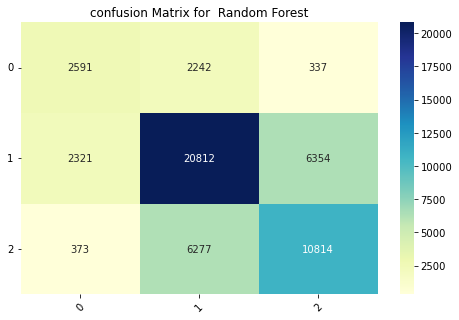

In [19]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

## Random Forest

In [20]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 18).fit(x_train, y_train)

In [21]:
prediction = clf.predict(x_test)

In [22]:
cm = confusion_matrix(y_test, prediction)
cm

array([[ 2500,  2575,    95],
       [ 1146, 24388,  3953],
       [  116,  6706, 10642]], dtype=int64)

In [23]:
accuracy_score(y_test, prediction)

0.7200552560388327

In [24]:
f1_score(y_test,prediction, average="micro")

0.7200552560388327

In [25]:
print("classification report for Random Forest :\n\n",classification_report(y_test, prediction))

classification report for Random Forest :

               precision    recall  f1-score   support

           1       0.66      0.48      0.56      5170
           2       0.72      0.83      0.77     29487
           3       0.72      0.61      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.70      0.64      0.66     52121
weighted avg       0.72      0.72      0.71     52121



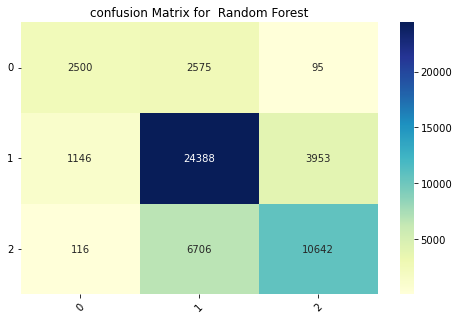

In [26]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

#### Here Random Forest Classifier algorithm able to achieve the F1-score of 0.7295 (73%) which is better than decision tree model (65%) 


In [27]:
# now predicting on test dataset
test=test.drop("building_id",axis=1)
clf_pred_test=clf.predict(test)

In [33]:
submission=pd.read_csv("D:/dinsha/ML PROJECT/nepal/submission_format.csv")
submission=submission.drop("damage_grade",axis=1)
clf_pred_test=pd.DataFrame(clf_pred_test)
submission["damage_grade"]=clf_pred_test
submission.head()

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3
